In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

###  Exploring the Data

In [44]:
df = pd.read_csv("/content/train.csv")

In [45]:
df.head()

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


###  Data Cleaning And Data Preprocessing

In [46]:
df.dtypes

index                  int64
beer/ABV             float64
beer/beerId            int64
beer/brewerId          int64
beer/name             object
beer/style            object
review/appearance    float64
review/aroma         float64
review/overall       float64
review/palate        float64
review/taste         float64
review/text           object
review/timeStruct     object
review/timeUnix        int64
user/ageInSeconds    float64
user/birthdayRaw      object
user/birthdayUnix    float64
user/gender           object
user/profileName      object
dtype: object

In [47]:
df.shape

(37500, 19)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer/ABV           37500 non-null  float64
 2   beer/beerId        37500 non-null  int64  
 3   beer/brewerId      37500 non-null  int64  
 4   beer/name          37500 non-null  object 
 5   beer/style         37500 non-null  object 
 6   review/appearance  37500 non-null  float64
 7   review/aroma       37500 non-null  float64
 8   review/overall     37500 non-null  float64
 9   review/palate      37500 non-null  float64
 10  review/taste       37500 non-null  float64
 11  review/text        37490 non-null  object 
 12  review/timeStruct  37500 non-null  object 
 13  review/timeUnix    37500 non-null  int64  
 14  user/ageInSeconds  7856 non-null   float64
 15  user/birthdayRaw   7856 non-null   object 
 16  user/birthdayUnix  785

In [49]:
df.isnull().sum()

index                    0
beer/ABV                 0
beer/beerId              0
beer/brewerId            0
beer/name                0
beer/style               0
review/appearance        0
review/aroma             0
review/overall           0
review/palate            0
review/taste             0
review/text             10
review/timeStruct        0
review/timeUnix          0
user/ageInSeconds    29644
user/birthdayRaw     29644
user/birthdayUnix    29644
user/gender          22186
user/profileName         5
dtype: int64

###  Here we can clean our missing values in two ways by deleting all the null valued rows or by filling the null valued areas with thier column perspective mean and mode values

*  I Don't want to delete all the values using dropna() instead i am using the null values also

In [50]:
for column in ['review/text']: df[column].fillna(df[column].mode()[0], inplace=True)

In [51]:
##Impute missing values
df['user/ageInSeconds'].fillna(df['user/ageInSeconds'].mean(), inplace=True)
df['user/birthdayRaw'].fillna(df['user/birthdayRaw'].mode()[0], inplace=True)
df['user/birthdayUnix'].fillna(df['user/birthdayUnix'].mean(), inplace=True)
df['user/gender'].fillna(df['user/gender'].mode()[0], inplace=True)
df['user/profileName'].fillna(df['user/profileName'].mode()[0], inplace=True)

##  Now checking the missing values in our data

In [52]:
df.isnull().sum()

index                0
beer/ABV             0
beer/beerId          0
beer/brewerId        0
beer/name            0
beer/style           0
review/appearance    0
review/aroma         0
review/overall       0
review/palate        0
review/taste         0
review/text          0
review/timeStruct    0
review/timeUnix      0
user/ageInSeconds    0
user/birthdayRaw     0
user/birthdayUnix    0
user/gender          0
user/profileName     0
dtype: int64

###  Exploring Data Analysis

In [53]:
df.describe()

,index,beer/ABV,beer/beerId,beer/brewerId,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/timeUnix,user/ageInSeconds,user/birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,3.750000e+04,3.750000e+04
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,1.544910e+08,1.544910e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,1.176705e+09,2.416303e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.176705e+09,2.416303e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.176705e+09,2.416303e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


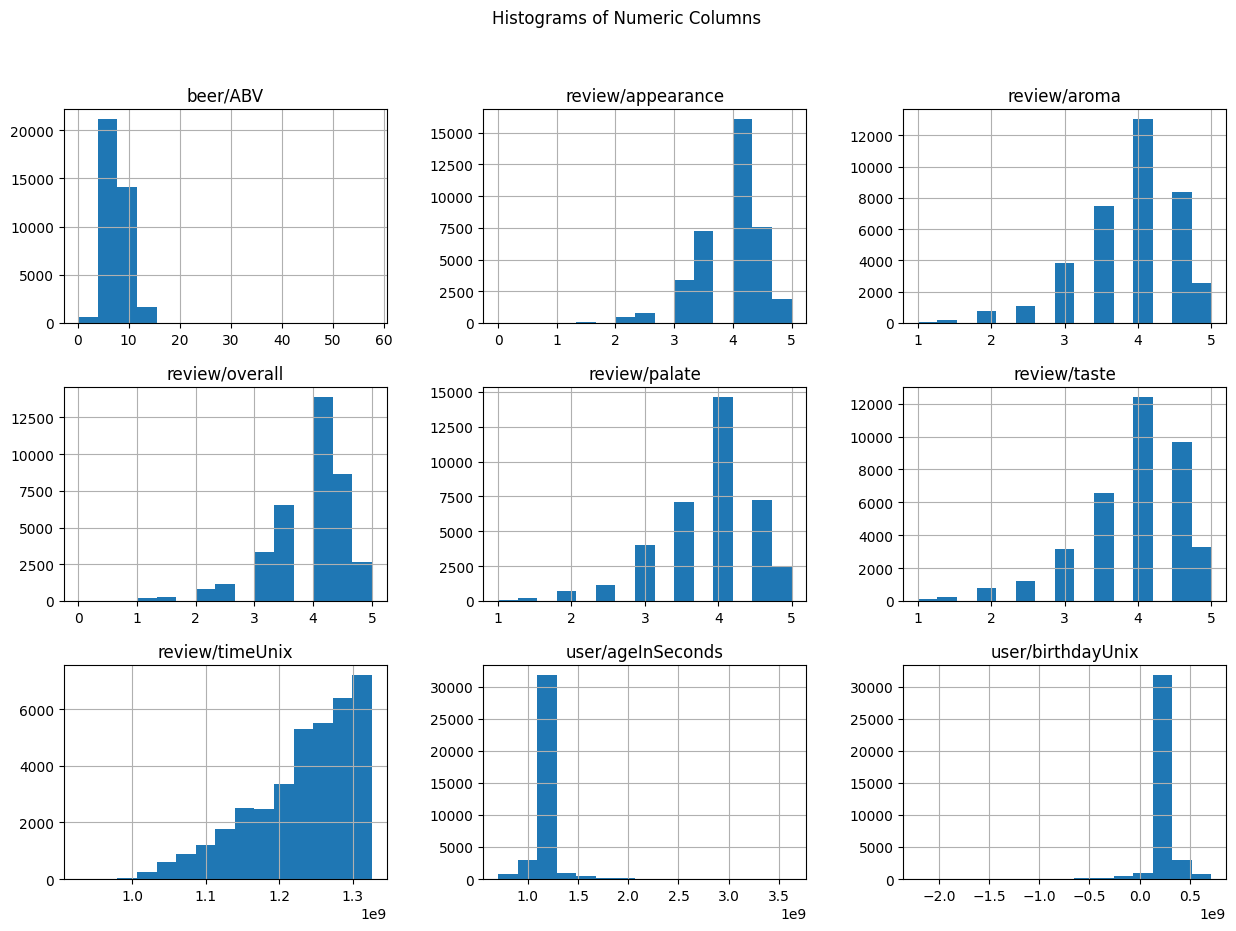

In [54]:
#Visualize the distribution of numeric columns
numeric_cols = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/overall', 'review/palate', 'review/taste', 'review/timeUnix', 'user/ageInSeconds', 'user/birthdayUnix']

df[numeric_cols].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

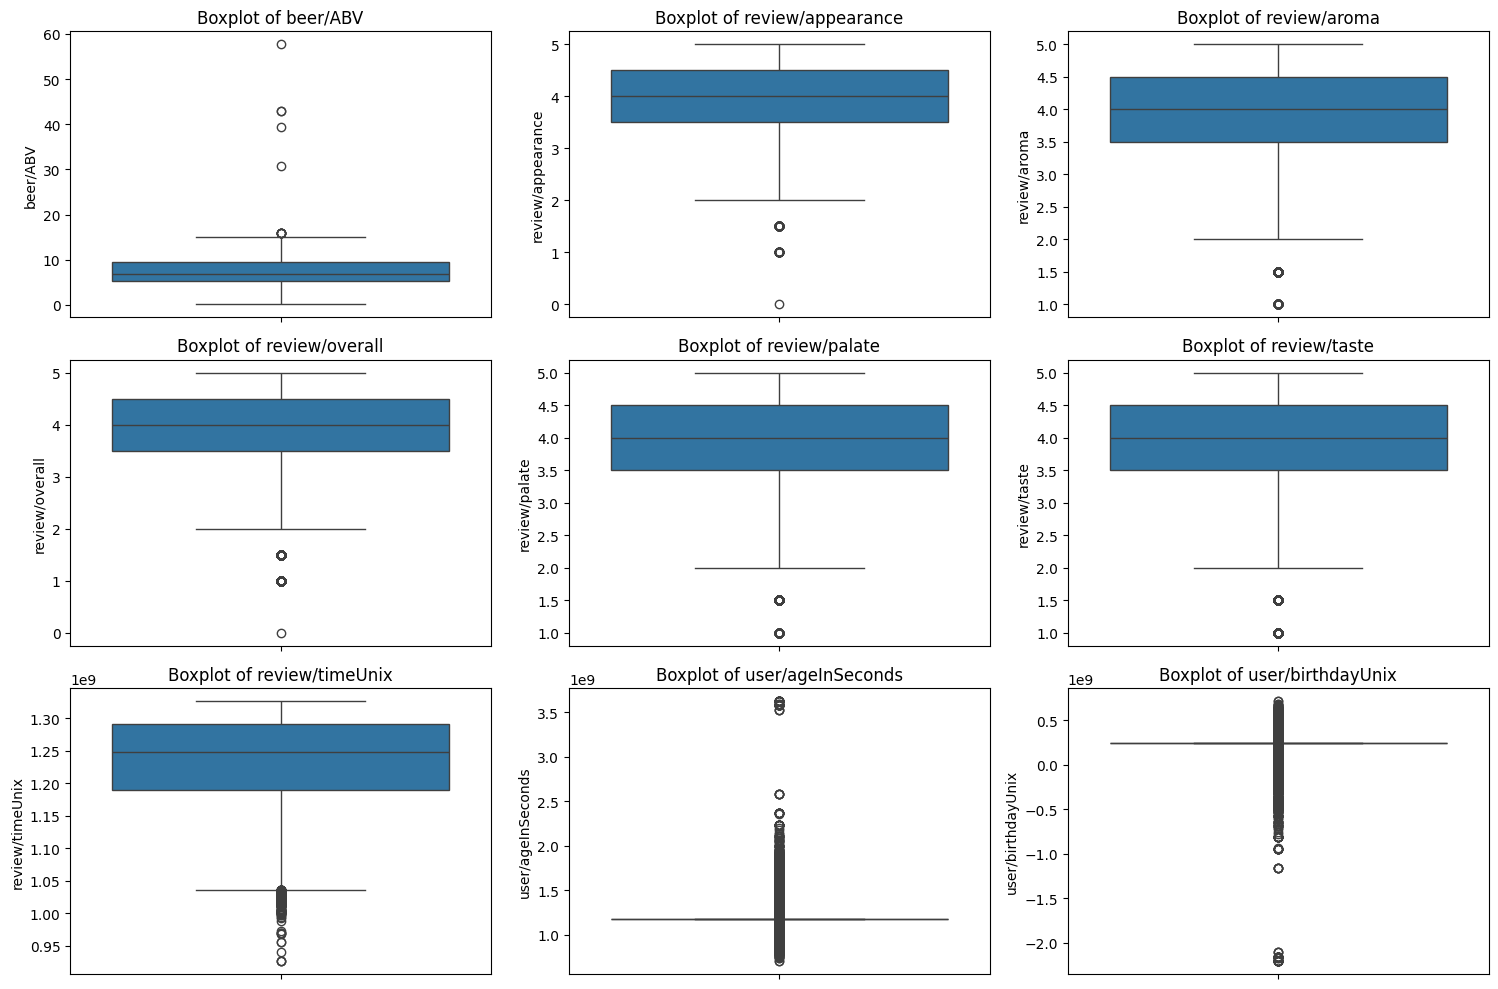

In [55]:
#Box Plots for Outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=col, data=df)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


###  Correlation Heatmap

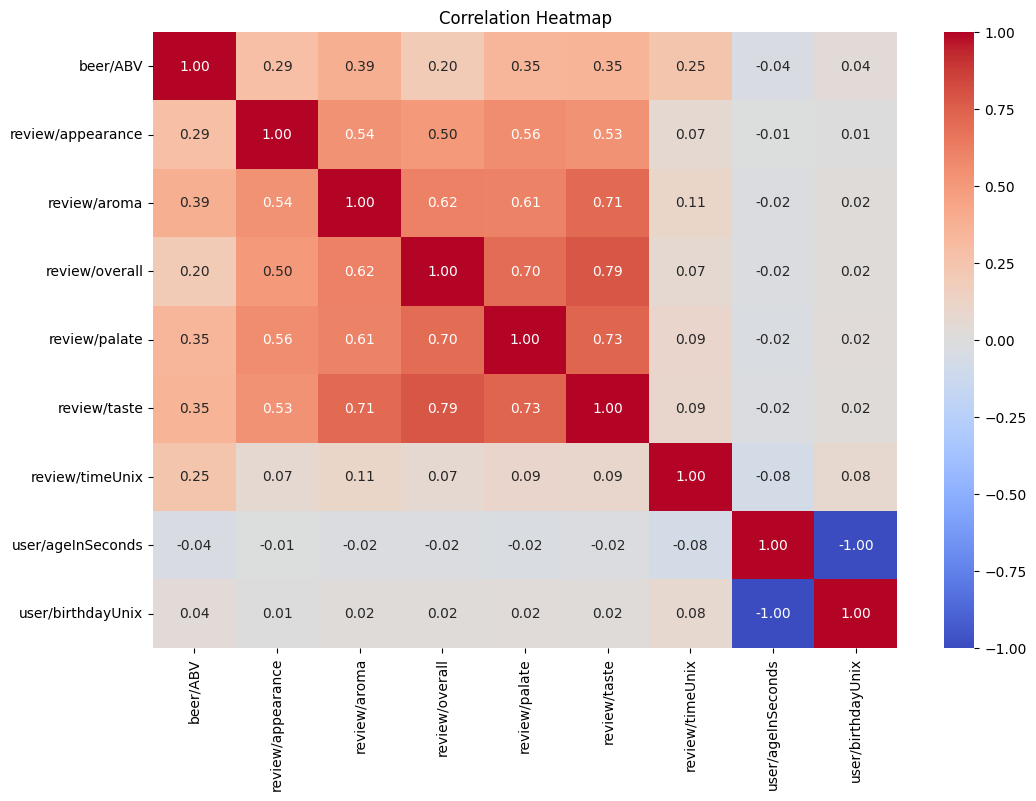

In [56]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

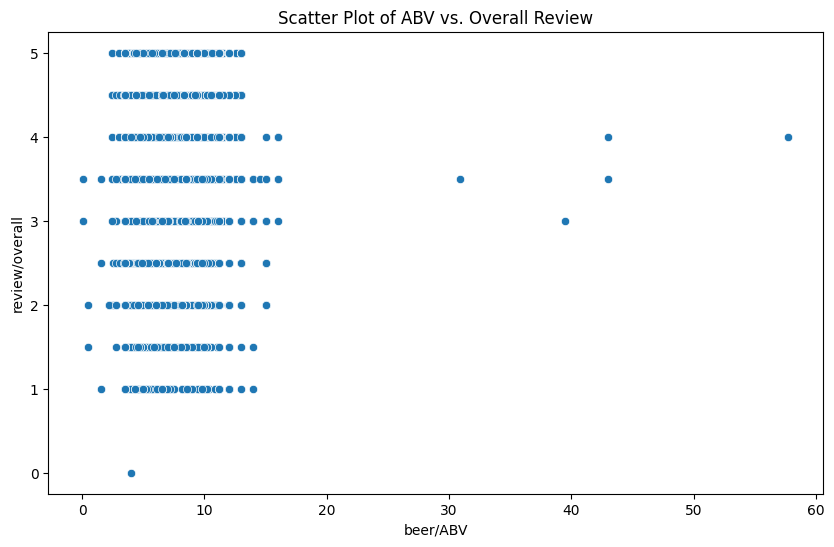

In [57]:
#relationships between pairs of features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='beer/ABV', y='review/overall', data=df)
plt.title('Scatter Plot of ABV vs. Overall Review')
plt.show()

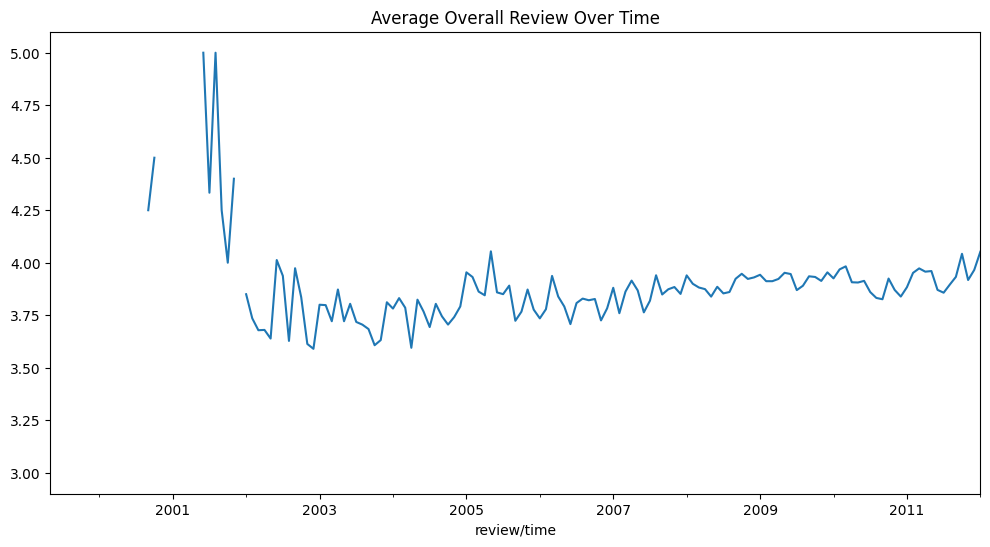

In [58]:
df['review/time'] = pd.to_datetime(df['review/timeUnix'], unit='s')

plt.figure(figsize=(12, 6))
df.set_index('review/time')['review/overall'].resample('M').mean().plot()
plt.title('Average Overall Review Over Time')
plt.show()

In [59]:
fig = px.scatter(df, x='beer/ABV', y='review/overall', color='beer/style', title='ABV vs. Overall Review by Beer Style')
fig.show()

###  Creating Regression Models

    'Linear Regression'
    'Random Forest'
    'Gradient Boosting'
    'Neural Network'

In [60]:
features = [
    'beer/ABV', 'beer/style', 'review/appearance', 'review/aroma',
    'review/palate', 'review/taste', 'user/ageInSeconds', 'user/gender'
]
target = 'review/overall'

X = df[features]
y = df[target]

In [61]:
numerical_features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'user/ageInSeconds']
categorical_features = ['beer/style', 'user/gender']

In [62]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [63]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape, X_test.shape

((30000, 103), (7500, 103))

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(random_state=42, max_iter=1000)
}

In [66]:
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {'MSE': mse, 'R2': r2}
    return results

# Evaluate models
results = evaluate_models(models, X_train, y_train, X_test, y_test)
results

{'Linear Regression': {'MSE': 0.15743235225819965, 'R2': 0.6799619327550686},
 'Random Forest': {'MSE': 0.1847812627856298, 'R2': 0.6243654029382599},
 'Gradient Boosting': {'MSE': 0.1550873258818959, 'R2': 0.6847290450947214},
 'Neural Network': {'MSE': 0.1657431997008909, 'R2': 0.6630671362626414}}

###  Creating Classification Models

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [68]:
# Discretize the target variable
bins = [0, 1, 2, 3, 4, 5]
labels = [0, 1, 2, 3, 4]
df['review/overall_class'] = pd.cut(df['review/overall'], bins=bins, labels=labels, include_lowest=True)

In [69]:
features = [
    'beer/ABV', 'beer/style', 'review/appearance', 'review/aroma',
    'review/palate', 'review/taste', 'user/ageInSeconds', 'user/gender'
]
target = 'review/overall_class'

X = df[features]
y = df[target]

In [70]:
numerical_features = ['beer/ABV', 'review/appearance', 'review/aroma', 'review/palate', 'review/taste', 'user/ageInSeconds']
categorical_features = ['beer/style', 'user/gender']


In [71]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [72]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000)
}


In [73]:
# Function to train and evaluate models
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        results[name] = {'Accuracy': accuracy, 'Classification Report': class_report}
    return results

# Evaluate models
results = evaluate_models(models, X_train, y_train, X_test, y_test)

In [74]:
results_df = pd.DataFrame(results).T
results_df['Classification Report'] = results_df['Classification Report'].apply(lambda x: x.replace('\n', '<br>'))
results_df

,Accuracy,Classification Report
Logistic Regression,0.7168,precision recall f1-score ...
Random Forest,0.6708,precision recall f1-score ...
Gradient Boosting,0.715467,precision recall f1-score ...
Neural Network,0.693867,precision recall f1-score ...


###  Neural Network Model

In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming df is your DataFrame with the cleaned data

# Convert categorical columns to category type
df['beer/style'] = df['beer/style'].astype('category')
df['user/gender'] = df['user/gender'].astype('category')

# Convert target variable to integer
df['review/overall'] = df['review/overall'].astype(int)

# Adjust target variable to start from 0 and be contiguous integers
y = df['review/overall'] - df['review/overall'].min()

# Split features and target
X = df.drop(columns=['review/overall'])

# Perform one-hot encoding on categorical columns
categorical_features = ['beer/style', 'user/gender']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the training data
X_train_enc = preprocessor.fit_transform(X_train)

# Transform the test data
X_test_enc = preprocessor.transform(X_test)


In [90]:
y_train = y_train.to_numpy().astype(int)
y_test = y_test.to_numpy().astype(int)

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_enc.shape[1],)),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(y.unique()), activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer-encoded targets
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 256)               25088     
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 6)                

In [92]:
# Train the model
history = model.fit(X_train_enc.toarray(), y_train,
                    epochs=25, batch_size=128, verbose=1,
                    validation_data=(X_test_enc.toarray(), y_test))

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test_enc.toarray(), y_test, verbose=0)
print(f'Test accuracy: {test_acc}')


Epoch 1/25
235/235 [==============================] - 4s 9ms/step - loss: 1.1263 - accuracy: 0.5795 - val_loss: 0.9979 - val_accuracy: 0.6045
Epoch 2/25
235/235 [==============================] - 2s 7ms/step - loss: 1.0241 - accuracy: 0.6007 - val_loss: 0.9886 - val_accuracy: 0.6057
Epoch 3/25
235/235 [==============================] - 2s 7ms/step - loss: 1.0082 - accuracy: 0.6054 - val_loss: 0.9814 - val_accuracy: 0.6085
Epoch 4/25
235/235 [==============================] - 2s 7ms/step - loss: 0.9987 - accuracy: 0.6105 - val_loss: 0.9792 - val_accuracy: 0.6100
Epoch 5/25
235/235 [==============================] - 2s 7ms/step - loss: 0.9961 - accuracy: 0.6078 - val_loss: 0.9785 - val_accuracy: 0.6092
Epoch 6/25
235/235 [==============================] - 2s 6ms/step - loss: 0.9908 - accuracy: 0.6086 - val_loss: 0.9779 - val_accuracy: 0.6092
Epoch 7/25
235/235 [==============================] - 2s 8ms/step - loss: 0.9879 - accuracy: 0.6092 - val_loss: 0.9752 - val_accuracy: 0.6101
Epoch 